## **Installation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10_10
from bokeh.palettes import magma
from bokeh.palettes import viridis, cividis

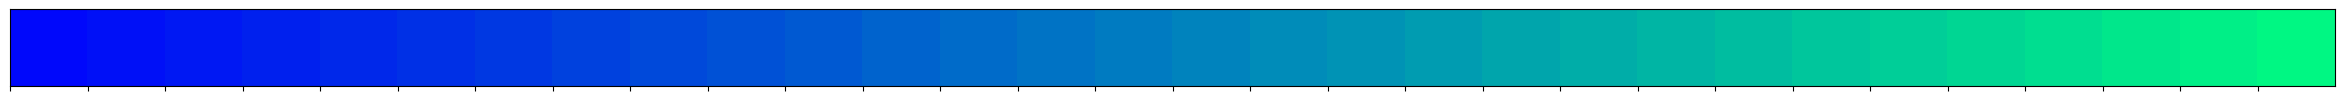

In [2]:
winter_palette = sns.color_palette("winter", 30)

# Plot the palette
sns.palplot(winter_palette)

In [3]:
# for color in winter_palette:
#     print(color)

In [4]:
import holoviews as hv
from colorcet.plotting import swatches, sine_combs

In [5]:
import colorcet as cc

## **Data Import**

In [6]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

In [7]:
df.columns

Index(['tour_code', 'tour_description', 'year', 'tourn_id', 'player_id',
       'course_id', 'permanent_tourn', 'first_name', 'last_name', 'round',
       'tournament_name', 'course_name', 'hole', 'hole_score', 'par_value',
       'yardage', 'shot', 'shot_type', 'num_of_strokes',
       'from_location_scorer', 'from_location_laser', 'to_location_scorer',
       'to_location_laser', 'distance', 'distance_to_pin', 'in_the_hole',
       'around_the_green', 'first_putt', 'dist_to_hole_after_shot', 'time',
       'lie', 'elevation', 'slope', 'x', 'y', 'z', 'dist_from_center',
       'dist_from_edge'],
      dtype='object')

## **Avg Score for each Hole for each Round**

In [8]:
shot_1 = df.loc[df['shot'] == 1]
avg_round = shot_1.groupby(['player_id', 'round','hole']).agg({'hole_score': 'sum'}).reset_index()
sg_calc = avg_round.groupby(['hole','round'])['hole_score'].mean().reset_index()
sg_calc.rename(columns={'hole_score': 'avg_hole_score_per_round'}, inplace=True)
sg_calc

,hole,round,avg_hole_score_per_round
0,1,1,3.833333
1,1,2,4.033333
2,1,3,4.166667
3,1,4,4.000000
4,2,1,3.066667
...,...,...,...
67,17,4,4.300000
68,18,1,2.900000
69,18,2,3.066667
70,18,3,3.166667


In [9]:
selected_columns = ['player_id', 'last_name', 'round','hole','hole_score','par_value','yardage', 'shot', 'shot_type', 'num_of_strokes',
       'from_location_scorer', 'from_location_laser', 'to_location_scorer',
       'to_location_laser', 'distance', 'distance_to_pin', 'in_the_hole',
       'around_the_green', 'first_putt', 'dist_to_hole_after_shot', 'time',
       'lie', 'elevation', 'slope', 'x', 'y', 'z', 'dist_from_center',
       'dist_from_edge']  # Add the column names you want to select
condensed_df = shot_1[selected_columns].copy()

player_list = df['last_name'].unique().tolist()

condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,4788,1255,Good,With,Level,"9,093.97","9,859.90",480.316,562,126
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,231,1307,Good,With,Level,"9,211.50","10,024.61",490.756,214,347
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,3440,1315,Good,With,Level,"8,447.83","10,051.84",507.876,127,344
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,5727,1326,Good,With,Level,"8,174.51","9,313.66",514.103,550,278
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,9062,1338,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,4695,1530,Good,With,Level,"11,327.13","9,337.86",508.390,386,47
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,7275,1542,Good,With,Level,"11,623.85","8,969.57",508.009,158,254
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,6993,1558,Good,With,Level,"11,329.40","8,533.72",499.617,326,14
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,5558,1613,Good,With,Level,"10,661.04","9,194.21",480.149,704,266


## **SG for each Hole for each Round for every Player**

In [10]:
# Assuming sg_calc and condensed_df are your DataFrames
condensed_df['sg_per_hole_per_round_per_player'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0] - row['hole_score'],
    axis=1
)

condensed_df['avg_hole_score_per_round'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0],
    axis=1
)

# Display the resulting DataFrame
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,Good,With,Level,"9,093.97","9,859.90",480.316,562,126,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,Good,With,Level,"9,211.50","10,024.61",490.756,214,347,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,Good,With,Level,"8,447.83","10,051.84",507.876,127,344,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,Good,With,Level,"8,174.51","9,313.66",514.103,550,278,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793,-0.766667,4.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,Good,With,Level,"11,327.13","9,337.86",508.390,386,47,0.766667,3.766667
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,Good,With,Level,"11,623.85","8,969.57",508.009,158,254,0.366667,4.366667
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,Good,With,Level,"11,329.40","8,533.72",499.617,326,14,0.166667,4.166667
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,Good,With,Level,"10,661.04","9,194.21",480.149,704,266,-0.700000,4.300000


In [11]:
# Assuming sg_calc and condensed_df are your DataFrames
condensed_df['dg_per_hole_per_round_per_player'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0] - row['hole_score'],
    axis=1
)

condensed_df['avg_hole_score_per_round'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0],
    axis=1
)

# Display the resulting DataFrame
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,elevation,slope,x,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round,dg_per_hole_per_round_per_player
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,With,Level,"9,093.97","9,859.90",480.316,562,126,-0.166667,3.833333,-0.166667
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,With,Level,"9,211.50","10,024.61",490.756,214,347,1.066667,3.066667,1.066667
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,With,Level,"8,447.83","10,051.84",507.876,127,344,-0.033333,3.966667,-0.033333
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,With,Level,"8,174.51","9,313.66",514.103,550,278,-0.233333,3.766667,-0.233333
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,With,Level,"8,962.09","8,539.50",506.913,1210,793,-0.766667,4.233333,-0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,With,Level,"11,327.13","9,337.86",508.390,386,47,0.766667,3.766667,0.766667
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,With,Level,"11,623.85","8,969.57",508.009,158,254,0.366667,4.366667,0.366667
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,With,Level,"11,329.40","8,533.72",499.617,326,14,0.166667,4.166667,0.166667
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,With,Level,"10,661.04","9,194.21",480.149,704,266,-0.700000,4.300000,-0.700000


# **Rolling SG by Round by Hole by Player**

In [12]:
from bokeh.plotting import figure, output_file
from bokeh.io import export_svgs

In [13]:

condensed_df = condensed_df.sort_values(by=['player_id', 'round', 'hole'])

# Calculate the rolling sum for each 'player_id'
condensed_df['rolling_sum_sg_per_hole_per_round_per_player'] = condensed_df.groupby('player_id')['sg_per_hole_per_round_per_player'].rolling(window=72, min_periods=1).sum().reset_index(level=0, drop=True)

# Create a new column 'round_hole_combination' with a numeric value representing the combination of 'round' and 'hole'
condensed_df['round_hole_combination'] = (condensed_df['round'] - 1) * 18 + condensed_df['hole']
# Now condensed_df contains a new column 'round_hole_combination' representing the combination of 'round' and 'hole' as a numeric value ranging from 1 to 72.

original_df = condensed_df[['last_name', 'round_hole_combination', 'sg_per_hole_per_round_per_player', 'rolling_sum_sg_per_hole_per_round_per_player']]

# Create a new DataFrame with additional rows
extra_rows = pd.DataFrame(columns=original_df.columns)

# Iterate through unique player_ids and add rows with specified conditions
for player_id in original_df['last_name'].unique():
    extra_row = pd.DataFrame({'last_name': [player_id], 'round_hole_combination': [0], 'sg_per_hole_per_round_per_player': [0], 'rolling_sum_sg_per_hole_per_round_per_player': [0]})
    extra_rows = pd.concat([extra_rows, extra_row], ignore_index=True)

new_df = pd.concat([original_df, extra_rows], ignore_index=True)


new_df = new_df.sort_values(by='round_hole_combination')

# Pivot the DataFrame
pivot_df = new_df.pivot_table(index='round_hole_combination', columns='last_name', values='rolling_sum_sg_per_hole_per_round_per_player', fill_value=0)

sorted_series = pivot_df.iloc[-1].sort_values(ascending=False)

desired_order = []

for i in range(0,30):
    desired_order.append(sorted_series.index[i])

#desired_order = ['Baddeley','Ogilvy','Haas','Choi','Donald','Howell III','Van Pelt','Mahan','Scott','Jacobson', 'Day','Mickelson','Singh','Bradley','Toms', 'Kuchar','Stricker','Dufner','Simpson','Snedeker', 'Johnson','Watson','Wilson','Senden','Watney', 'Byrd','Reavie','Wilson','Reavie','Yang']

pivot_df = pivot_df[desired_order]

# Convert the pivot table to a Bokeh ColumnDataSource
source = ColumnDataSource(pivot_df)

# Create a Bokeh figure
p = figure(width=1500, height=850, title='Progress of SG Throughout 2011 TOUR Championship',x_range=(0, 78),
           x_axis_label='Championship Hole', y_axis_label='Rolling Sum of SG')

# Use a distinct color palette for lines
line_colors = viridis(30) #winter_palette


for i, column in enumerate(desired_order):
    line_color = line_colors[i % len(line_colors)]
    #line_color = winter_palette[i]
    #line_color = winter_palette[i % len(winter_palette)]
    p.line(x='round_hole_combination', y=column, source=source,
           line_width=8, line_alpha=0.6, legend_label=column, line_color=line_color)            

# Customize the legend
p.xaxis.axis_label_text_font_size = '18pt'  # Increase x-axis label font size
p.yaxis.axis_label_text_font_size = '18pt'
p.legend.title = 'Player'
p.title.text_font_size = '25pt'
p.legend.label_text_font_size = '8pt'
p.legend.location = "top_right"  # Change the location to top_right
p.legend.orientation = "vertical"  # Change the orientation to vertical
p.legend.click_policy = "hide"

show(p)
# # Show the plot
# p.output_backend = "svg"
# export_svgs(p, filename="PFFFF.svg")

In [14]:
# Calculate the rolling sum for each 'player_id'
condensed_df['rolling_sum_of_3_hoels_sg_per_hole_per_round_per_player'] = condensed_df.groupby('player_id')['sg_per_hole_per_round_per_player'].rolling(window=3, min_periods=3).sum().reset_index(level=0, drop=True)


# Hottest 3 Hole SG Streak

In [15]:
condensed_df.sort_values(by='rolling_sum_of_3_hoels_sg_per_hole_per_round_per_player', ascending=False).iloc[:5]

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round,dg_per_hole_per_round_per_player,rolling_sum_sg_per_hole_per_round_per_player,round_hole_combination,rolling_sum_of_3_hoels_sg_per_hole_per_round_per_player
3349,24924,Haas,2,6,2,3,209,1,S,1,...,"8,822.02",475.574,59,0,0.933333,2.933333,0.933333,3.500000,24,3.266667
4857,22371,Baddeley,3,15,4,5,525,1,S,1,...,"9,062.93",515.453,1288,850,0.533333,4.533333,0.533333,7.133333,51,2.966667
4861,22371,Baddeley,3,16,3,4,481,1,S,1,...,"8,515.43",498.872,30,310,1.200000,4.200000,1.200000,8.333333,52,2.933333
7743,25686,Dufner,4,9,4,5,600,1,S,1,...,"9,588.10",494.213,56,352,0.733333,4.733333,0.733333,2.066667,63,2.866667
5800,26476,Reavie,3,18,3,3,235,1,S,1,...,"9,836.05",494.280,159,314,0.166667,3.166667,0.166667,-2.166667,54,2.700000


# Coldest 3 Hole SG Streak

In [16]:
condensed_df.sort_values(by='rolling_sum_of_3_hoels_sg_per_hole_per_round_per_player', ascending=True).iloc[:5]

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round,dg_per_hole_per_round_per_player,rolling_sum_sg_per_hole_per_round_per_player,round_hole_combination,rolling_sum_of_3_hoels_sg_per_hole_per_round_per_player
5721,25804,Watson,3,17,9,4,470,1,S,1,...,"9,161.27",475.808,493,2,-4.666667,4.333333,-4.666667,-5.333333,53,-5.933333
7783,25804,Watson,4,1,5,4,424,1,S,1,...,"9,925.39",480.705,1384,878,-1.000000,4.000000,-1.000000,-6.166667,55,-5.500000
5732,25804,Watson,3,18,3,3,235,1,S,1,...,"9,868.63",495.375,527,217,0.166667,3.166667,0.166667,-5.166667,54,-5.300000
2798,22405,Rose,2,5,5,4,520,1,S,1,...,"8,719.39",496.497,1179,763,-0.800000,4.200000,-0.800000,-3.433333,23,-3.800000
2012,31323,Woodland,1,17,6,4,470,1,S,1,...,"9,222.79",477.645,166,358,-2.000000,4.000000,-2.000000,-2.833333,17,-3.666667


# **SG Normal Distributions for each Player / Round**


In [17]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []


for player in range(0, len(player_list)):  # Assuming holes range from 1 to 18
    list_of_sg_per_hole_per_round_per_players = condensed_df[
        (condensed_df['par_value'] == 3) & (condensed_df['last_name'] == player_list[player])
    ]['sg_per_hole_per_round_per_player'].values.tolist()
    
    params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
    
    result_dict = {
        'player': player_list[player],
        'SG':sum(list_of_sg_per_hole_per_round_per_players),
        'mean': params[0],
        'std': params[1]
    }

    results_list.append(result_dict)

        # print(f"Round {round_num}, player {player}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Best Par 3 Player

- eventually do this for all approach shots

In [18]:
df_results.sort_values(by='SG', ascending=False).iloc[:5]

,player,SG,mean,std
28,Woodland,5.333333,0.333333,0.455826
17,Mahan,3.333333,0.208333,0.461504
25,Day,2.333333,0.145833,0.586050
22,Reavie,2.333333,0.145833,0.505920
20,Dufner,2.333333,0.145833,0.567998


# Most Consistant Player on Par 3s (good or bad)

In [19]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,player,SG,mean,std
12,Van Pelt,-0.666667,-0.041667,0.267057
0,Mickelson,1.333333,0.083333,0.364387
23,Watney,0.333333,0.020833,0.420462
14,Choi,0.333333,0.020833,0.420462
21,Watson,-0.666667,-0.041667,0.452386


In [20]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []


for player in range(0, len(player_list)):  # Assuming holes range from 1 to 18
    list_of_sg_per_hole_per_round_per_players = condensed_df[
        (condensed_df['par_value'] == 4) & (condensed_df['last_name'] == player_list[player])
    ]['sg_per_hole_per_round_per_player'].values.tolist()
    
    params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
    
    result_dict = {
        'player': player_list[player],
        'SG':sum(list_of_sg_per_hole_per_round_per_players),
        'mean': params[0],
        'std': params[1]
    }

    results_list.append(result_dict)

        # print(f"Round {round_num}, player {player}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Best Par 4 Player

In [21]:
df_results.sort_values(by='SG', ascending=False).iloc[:5]

,player,SG,mean,std
8,Ogilvy,7.8,0.162500,0.594793
9,Baddeley,7.8,0.162500,0.679788
14,Choi,6.8,0.141667,0.643648
13,Donald,4.8,0.100000,0.534287
5,Jacobson,3.8,0.079167,0.536476


# Most Consistant Player on Par 4s (good or bad)

In [22]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,player,SG,mean,std
7,Howell III,2.8,0.058333,0.464404
11,Kuchar,1.8,0.037500,0.466549
16,Yang,-8.2,-0.170833,0.479758
17,Mahan,0.8,0.016667,0.504884
19,Byrd,-3.2,-0.066667,0.518456


In [23]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []


for player in range(0, len(player_list)):  # Assuming holes range from 1 to 18
    list_of_sg_per_hole_per_round_per_players = condensed_df[
        (condensed_df['par_value'] == 5) & (condensed_df['last_name'] == player_list[player])
    ]['sg_per_hole_per_round_per_player'].values.tolist()
    
    params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
    
    result_dict = {
        'player': player_list[player],
        'SG':sum(list_of_sg_per_hole_per_round_per_players),
        'mean': params[0],
        'std': params[1]
    }

    results_list.append(result_dict)

        # print(f"Round {round_num}, player {player}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Best Par 5 Player

In [24]:
df_results.sort_values(by='SG', ascending=False).iloc[:5]

,player,SG,mean,std
17,Mahan,3.033333,0.379167,0.462763
25,Day,2.033333,0.254167,0.378571
7,Howell III,2.033333,0.254167,0.690398
23,Watney,2.033333,0.254167,0.714131
18,Haas,2.033333,0.254167,0.367400


# Most Consistant Player on Par 5s (good or bad)

In [25]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,player,SG,mean,std
18,Haas,2.033333,0.254167,0.367400
25,Day,2.033333,0.254167,0.378571
0,Mickelson,0.033333,0.004167,0.386738
4,Senden,0.033333,0.004167,0.397365
12,Van Pelt,2.033333,0.254167,0.399978


In [26]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []


for player in range(0, len(player_list)):  # Assuming holes range from 1 to 18
    list_of_sg_per_hole_per_round_per_players = condensed_df[
            (condensed_df['last_name'] == player_list[player])
    ]['sg_per_hole_per_round_per_player'].values.tolist()
    
    params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
    
    result_dict = {
        'player': player_list[player],
        'SG':sum(list_of_sg_per_hole_per_round_per_players),
        'mean': params[0],
        'std': params[1]
    }

    results_list.append(result_dict)

        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Most Consistant Player of the Champioship (for good or bad)

In [27]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,player,SG,mean,std
12,Van Pelt,4.166667,0.057870,0.474927
0,Mickelson,3.166667,0.043981,0.482209
17,Mahan,7.166667,0.099537,0.506912
11,Kuchar,-1.833333,-0.025463,0.506912
7,Howell III,5.166667,0.071759,0.508862


# Least Consistant Player of the Champioship

In [28]:
df_results.sort_values(by='std', ascending=False).iloc[:5]

,player,SG,mean,std
22,Reavie,-5.833333,-0.081019,0.772279
21,Watson,-3.833333,-0.053241,0.765068
27,Johnson,-3.833333,-0.053241,0.764463
23,Watney,-5.833333,-0.081019,0.715650
4,Senden,-4.833333,-0.067130,0.683367


In [29]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []

for round_num in range(1, 5):  # Assuming rounds range from 1 to 4
    for player in range(0, len(player_list)):  # Assuming holes range from 1 to 18
        list_of_sg_per_hole_per_round_per_players = condensed_df[
            (condensed_df['round'] == round_num) & (condensed_df['last_name'] == player_list[player])
        ]['sg_per_hole_per_round_per_player'].values.tolist()
        
        params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
        
        result_dict = {
            'round': round_num,
            'player': player_list[player],
            'SG':sum(list_of_sg_per_hole_per_round_per_players),
            'mean': params[0],
            'std': params[1]
        }

        results_list.append(result_dict)

        # print(f"Round {round_num}, player {player}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Best Player's Round of the Champioship

In [30]:
df_results.sort_values(by='mean', ascending=False).iloc[:5]

,round,player,SG,mean,std
69,3,Baddeley,6.566667,0.364815,0.770159
51,2,Watson,5.200000,0.288889,0.472712
29,1,Bradley,5.066667,0.281481,0.570815
72,3,Van Pelt,4.566667,0.253704,0.493306
77,3,Mahan,4.566667,0.253704,0.685038


# Worst Player's Round of the Champioship

In [31]:
df_results.sort_values(by='mean', ascending=True).iloc[:5]

,round,player,SG,mean,std
81,3,Watson,-8.433333,-0.468519,1.181361
52,2,Reavie,-7.800000,-0.433333,0.784495
40,2,Rose,-5.800000,-0.322222,0.769399
3,1,Singh,-4.933333,-0.274074,0.707330
49,2,Byrd,-4.800000,-0.266667,0.622619


# Most Consistant Player's Round of the Champioship

In [32]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,round,player,SG,mean,std
42,2,Van Pelt,-0.800000,-0.044444,0.329609
107,4,Mahan,-0.666667,-0.037037,0.341726
67,3,Howell III,2.566667,0.142593,0.342072
90,4,Mickelson,-0.666667,-0.037037,0.347102
7,1,Howell III,2.066667,0.114815,0.359049


# Least Consistant Player's Round of the Champioship

In [33]:
df_results.sort_values(by='std', ascending=False).iloc[:5]

,round,player,SG,mean,std
81,3,Watson,-8.433333,-0.468519,1.181361
117,4,Johnson,0.333333,0.018519,0.995931
23,1,Watney,-2.933333,-0.162963,0.947113
114,4,Snedeker,1.333333,0.074074,0.852922
4,1,Senden,-3.933333,-0.218519,0.850869


# **Course Difficulty**

The Birdiable Hole Score, derived by subtracting the field's average hole score for that round from the par value, serves as a concise indicator of proficiency on individual holes. A positive score highlights the ability to consistently score under par, pinpointing opportunities for strategic advantage on seemingly easier holes. This metric not only illuminates a player's strengths and weaknesses but also offers insights into the impact of factors such as par values, tee positions, and pin placements on overall performance. In essence, the Birdiable Hole Score serves as a valuable tool for assessing a golfer's ability to navigate and capitalize on scoring opportunities throughout the course.

In [34]:
condensed_df['Birdiable_hole_score'] = condensed_df['par_value'] - condensed_df['avg_hole_score_per_round']

unique_combinations_df = condensed_df.drop_duplicates(subset='round_hole_combination')

# Sort the unique combinations DataFrame by 'Birdiable_hole_score'
Birdiable_hole_scores_df = unique_combinations_df.sort_values(by='Birdiable_hole_score', ascending=False)

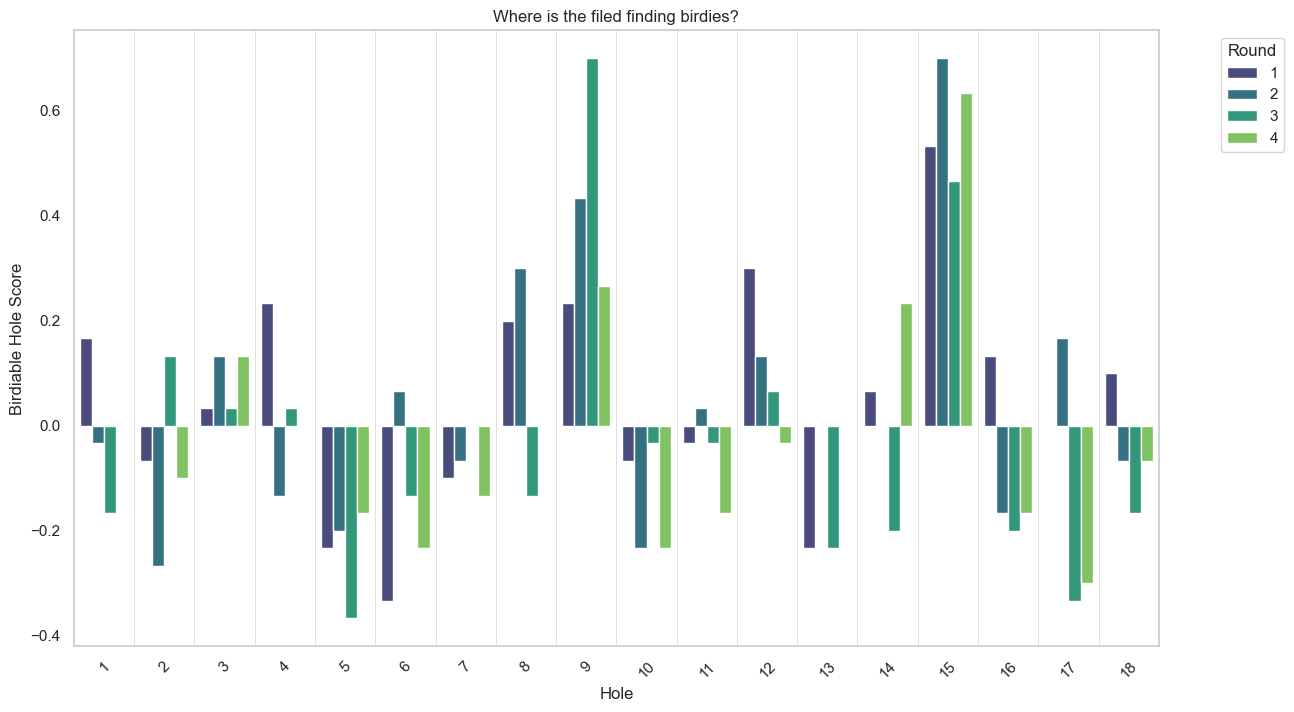

In [35]:
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using seaborn with improved aesthetics
ax = sns.barplot(x='hole', y='Birdiable_hole_score', data=Birdiable_hole_scores_df, palette='viridis', hue='round', errorbar='sd')  # ci='sd' adds error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Hole')
plt.ylabel('Birdiable Hole Score')
plt.title('Where is the field finding birdies?')

# Move the legend to the upper left for better visibility
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add faint vertical dividers between each hole
ax.set_xticks([i + 0.5 for i in range(len(Birdiable_hole_scores_df['hole'].unique()))], minor=True)
ax.set_xticklabels([], minor=True)
plt.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.5)

# Remove horizontal dividers
ax.yaxis.grid(False)

# Show the plot
plt.show()


# **SG Normal Distributions for each Hole each Round**

In [36]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []

for round_num in range(1, 5):  # Assuming rounds range from 1 to 4
    for hole_num in range(1, 19):  # Assuming holes range from 1 to 18
        list_of_sg_per_hole_per_round_per_players = condensed_df[
            (condensed_df['round'] == round_num) & (condensed_df['hole'] == hole_num)
        ]['sg_per_hole_per_round_per_player'].values.tolist()
        
        params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
        
        result_dict = {
            'round': round_num,
            'hole': hole_num,
            'mean': params[0],
            'std': params[1]
        }

        results_list.append(result_dict)

        # print(f"Round {round_num}, Hole {hole_num}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.

df_results = pd.DataFrame(results_list)

# Easiest Hole of the Champioship

- Will compare this bayes normal dist mean of SG normal dist to birdiable hole score eventually, as the birdiable chart clearly disagrees with the next 2 lines

In [37]:
df_results.sort_values(by='mean', ascending=False).iloc[:5]

,round,hole,mean,std
21,2,4,4.144833e-16,0.763035
60,4,7,4.144833e-16,0.561743
43,3,8,4.144833e-16,0.718022
36,3,1,2.960595e-16,0.582142
69,4,16,2.960595e-16,0.636832


# Toughest Hole of the Champioship


In [38]:
df_results.sort_values(by='mean', ascending=True).iloc[:5]

,round,hole,mean,std
68,4,15,-4.144833e-16,0.706321
40,3,5,-4.144833e-16,0.752034
6,1,7,-3.552714e-16,0.597216
52,3,17,-2.960595e-16,1.043498
26,2,9,-2.368476e-16,0.558768


# Most Consistent Hole of the Champioship

In [39]:
df_results.sort_values(by='std', ascending=True).iloc[:5]

,round,hole,mean,std
28,2,11,1.184238e-16,0.314466
37,3,2,2.960595e-17,0.339935
30,2,13,0.000000e+00,0.447214
0,1,1,1.480297e-16,0.453382
12,1,13,5.921189e-17,0.495536


# Least Consistent Hole of the Champioship

In [40]:
df_results.sort_values(by='std', ascending=False).iloc[:5]

,round,hole,mean,std
52,3,17,-2.960595e-16,1.043498
16,1,17,0.000000e+00,0.856349
27,2,10,5.921189e-17,0.803465
21,2,4,4.144833e-16,0.763035
18,2,1,-1.184238e-16,0.752034


In [41]:
hole_stats = df_results.groupby('hole').agg({'mean': ['min', 'max'], 'std': ['min', 'max']})

# Rename the columns for clarity
hole_stats.columns = ['min_mean', 'max_mean', 'min_std', 'max_std']

# Merge hole_stats back to df_results on 'hole'
df_results = pd.merge(df_results, hole_stats, on='hole')

df_results['mean_diff'] = df_results['max_mean'] - df_results['min_mean']
df_results['std_diff'] = df_results['max_std'] - df_results['min_std']

# Largest Flux Holes throughout Championship

In [42]:
top_results = df_results.sort_values(by='std_diff', ascending=False)

top_results_unique_holes = top_results.drop_duplicates(subset='hole')

top_results_unique_holes.iloc[:5]

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
40,1,11,-1.184238e-16,0.657436,-1.480297e-16,1.184238e-16,0.314466,0.687184,2.664535e-16,0.372718
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
16,1,5,5.921189e-17,0.495536,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637


# Smallest Flux Holes throughout Championship

In [43]:
top_results = df_results.sort_values(by='std_diff', ascending=True)

top_results_unique_holes = top_results.drop_duplicates(subset='hole')

top_results_unique_holes.iloc[:5]

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
35,4,9,5.921189e-17,0.628932,-2.368476e-16,5.921189e-17,0.558768,0.628932,2.960595e-16,0.070164
27,4,7,4.144833e-16,0.561743,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
59,4,15,-4.144833e-16,0.706321,-4.144833e-16,1.184238e-16,0.585947,0.706321,5.329071e-16,0.120374
31,4,8,0.000000e+00,0.730297,-1.776357e-16,4.144833e-16,0.600000,0.737111,5.921189e-16,0.137111


In [44]:
condensed_df.to_csv('FE_Strokes.csv', index=False)